In [3]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
#Loading the data set
df = pd.read_csv('electricity_bill_dataset.csv')
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [5]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [7]:
# Data preparation
## Data Cleaning
# Checking missing values
df.isna().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [8]:
# Checking duplicates
df.duplicated().sum()

0

In [9]:
df['ElectricityBill'] = df['ElectricityBill'].astype(float)
df['ElectricityBill']

0        3225.6
1        3806.4
2        3203.2
3        4370.0
4        4204.4
          ...  
45340    6035.6
45341    4862.0
45342    5176.5
45343    5535.2
45344    3544.1
Name: ElectricityBill, Length: 45345, dtype: float64

In [10]:
# Feature Engineering
# Method to categorize seasons
def categorize_seasons(Month):
    if Month in [3, 4, 5]:
        return "Summer"
    elif Month in [6, 7, 8, 9]:
        return  "Monsoon"
    else:
        return  "Winter"

    
df['season'] = df['Month'].apply(categorize_seasons)

df.head()


,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill,season
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6,Winter
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4,Summer
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2,Monsoon
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0,Monsoon
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4,Winter


In [11]:
# MonthlyCostPerHour
df['MonthlyCostPerHour'] = df['ElectricityBill'] / df['MonthlyHours']
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill,season,MonthlyCostPerHour
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6,Winter,8.4
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4,Summer,7.8
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2,Monsoon,7.7
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0,Monsoon,9.2
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4,Winter,9.2


In [12]:
# Tariff Efficiency
df['TariffEfficiency'] = df['ElectricityBill'] / df['TariffRate']
df.head()


,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill,season,MonthlyCostPerHour,TariffEfficiency
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6,Winter,8.4,384.0
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4,Summer,7.8,488.0
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2,Monsoon,7.7,416.0
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0,Monsoon,9.2,475.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4,Winter,9.2,457.0


In [13]:
# Total Appliance Usage
df['TotalApplianceHours'] = df[['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']].sum(axis=1)
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill,season,MonthlyCostPerHour,TariffEfficiency,TotalApplianceHours
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6,Winter,8.4,384.0,48.0
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4,Summer,7.8,488.0,47.0
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2,Monsoon,7.7,416.0,42.0
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0,Monsoon,9.2,475.0,54.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4,Winter,9.2,457.0,48.0


In [14]:
# Percentage Contribution of Each Appliance
appliances = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']
for appliance in appliances:
    df[f'{appliance}_Contribution'] = (df[appliance] / df['TotalApplianceHours']) * 100
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,...,season,MonthlyCostPerHour,TariffEfficiency,TotalApplianceHours,Fan_Contribution,Refrigerator_Contribution,AirConditioner_Contribution,Television_Contribution,Monitor_Contribution,MotorPump_Contribution
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,...,Winter,8.4,384.0,48.0,33.333333,47.916667,4.166667,12.500000,2.083333,0.0
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,...,Summer,7.8,488.0,47.0,40.425532,46.808511,4.255319,6.382979,2.127660,0.0
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,...,Monsoon,7.7,416.0,42.0,16.666667,47.619048,4.761905,14.285714,16.666667,0.0
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,...,Monsoon,9.2,475.0,54.0,12.962963,40.740741,5.555556,38.888889,1.851852,0.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,...,Winter,9.2,457.0,48.0,22.916667,47.916667,4.166667,22.916667,2.083333,0.0


In [15]:
# Usage Category
def categorize_usage(bill):
    if bill < 2500:
        return 'Low'
    elif bill < 5000:
        return 'Medium'
    else:
        return 'High'

df['UsageCategory'] = df['ElectricityBill'].apply(categorize_usage)
df.head(15)

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,...,MonthlyCostPerHour,TariffEfficiency,TotalApplianceHours,Fan_Contribution,Refrigerator_Contribution,AirConditioner_Contribution,Television_Contribution,Monitor_Contribution,MotorPump_Contribution,UsageCategory
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,...,8.4,384.0,48.0,33.333333,47.916667,4.166667,12.500000,2.083333,0.0,Medium
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,...,7.8,488.0,47.0,40.425532,46.808511,4.255319,6.382979,2.127660,0.0,Medium
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,...,7.7,416.0,42.0,16.666667,47.619048,4.761905,14.285714,16.666667,0.0,Medium
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,...,9.2,475.0,54.0,12.962963,40.740741,5.555556,38.888889,1.851852,0.0,Medium
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,...,9.2,457.0,48.0,22.916667,47.916667,4.166667,22.916667,2.083333,0.0,Medium
5,13,22.0,0.0,18.0,1.0,0,6,Ratnagiri,Adani Power Ltd.,471,...,7.4,471.0,54.0,24.074074,40.740741,0.000000,33.333333,1.851852,0.0,Medium
6,23,22.0,3.0,20.0,12.0,0,5,New Delhi,Kalpataru Power,755,...,8.5,755.0,80.0,28.750000,27.500000,3.750000,25.000000,15.000000,0.0,High
7,22,23.0,0.0,21.0,1.0,0,12,New Delhi,Adani Power Ltd.,492,...,8.5,492.0,67.0,32.835821,34.328358,0.000000,31.343284,1.492537,0.0,Medium
8,8,20.0,2.0,8.0,1.0,0,8,New Delhi,Orient Green,546,...,8.5,546.0,39.0,20.512821,51.282051,5.128205,20.512821,2.564103,0.0,Medium
9,10,23.0,0.0,18.0,7.0,0,1,Dahej,Sterlite Power Transmission Ltd,578,...,7.6,578.0,58.0,17.241379,39.655172,0.000000,31.034483,12.068966,0.0,Medium


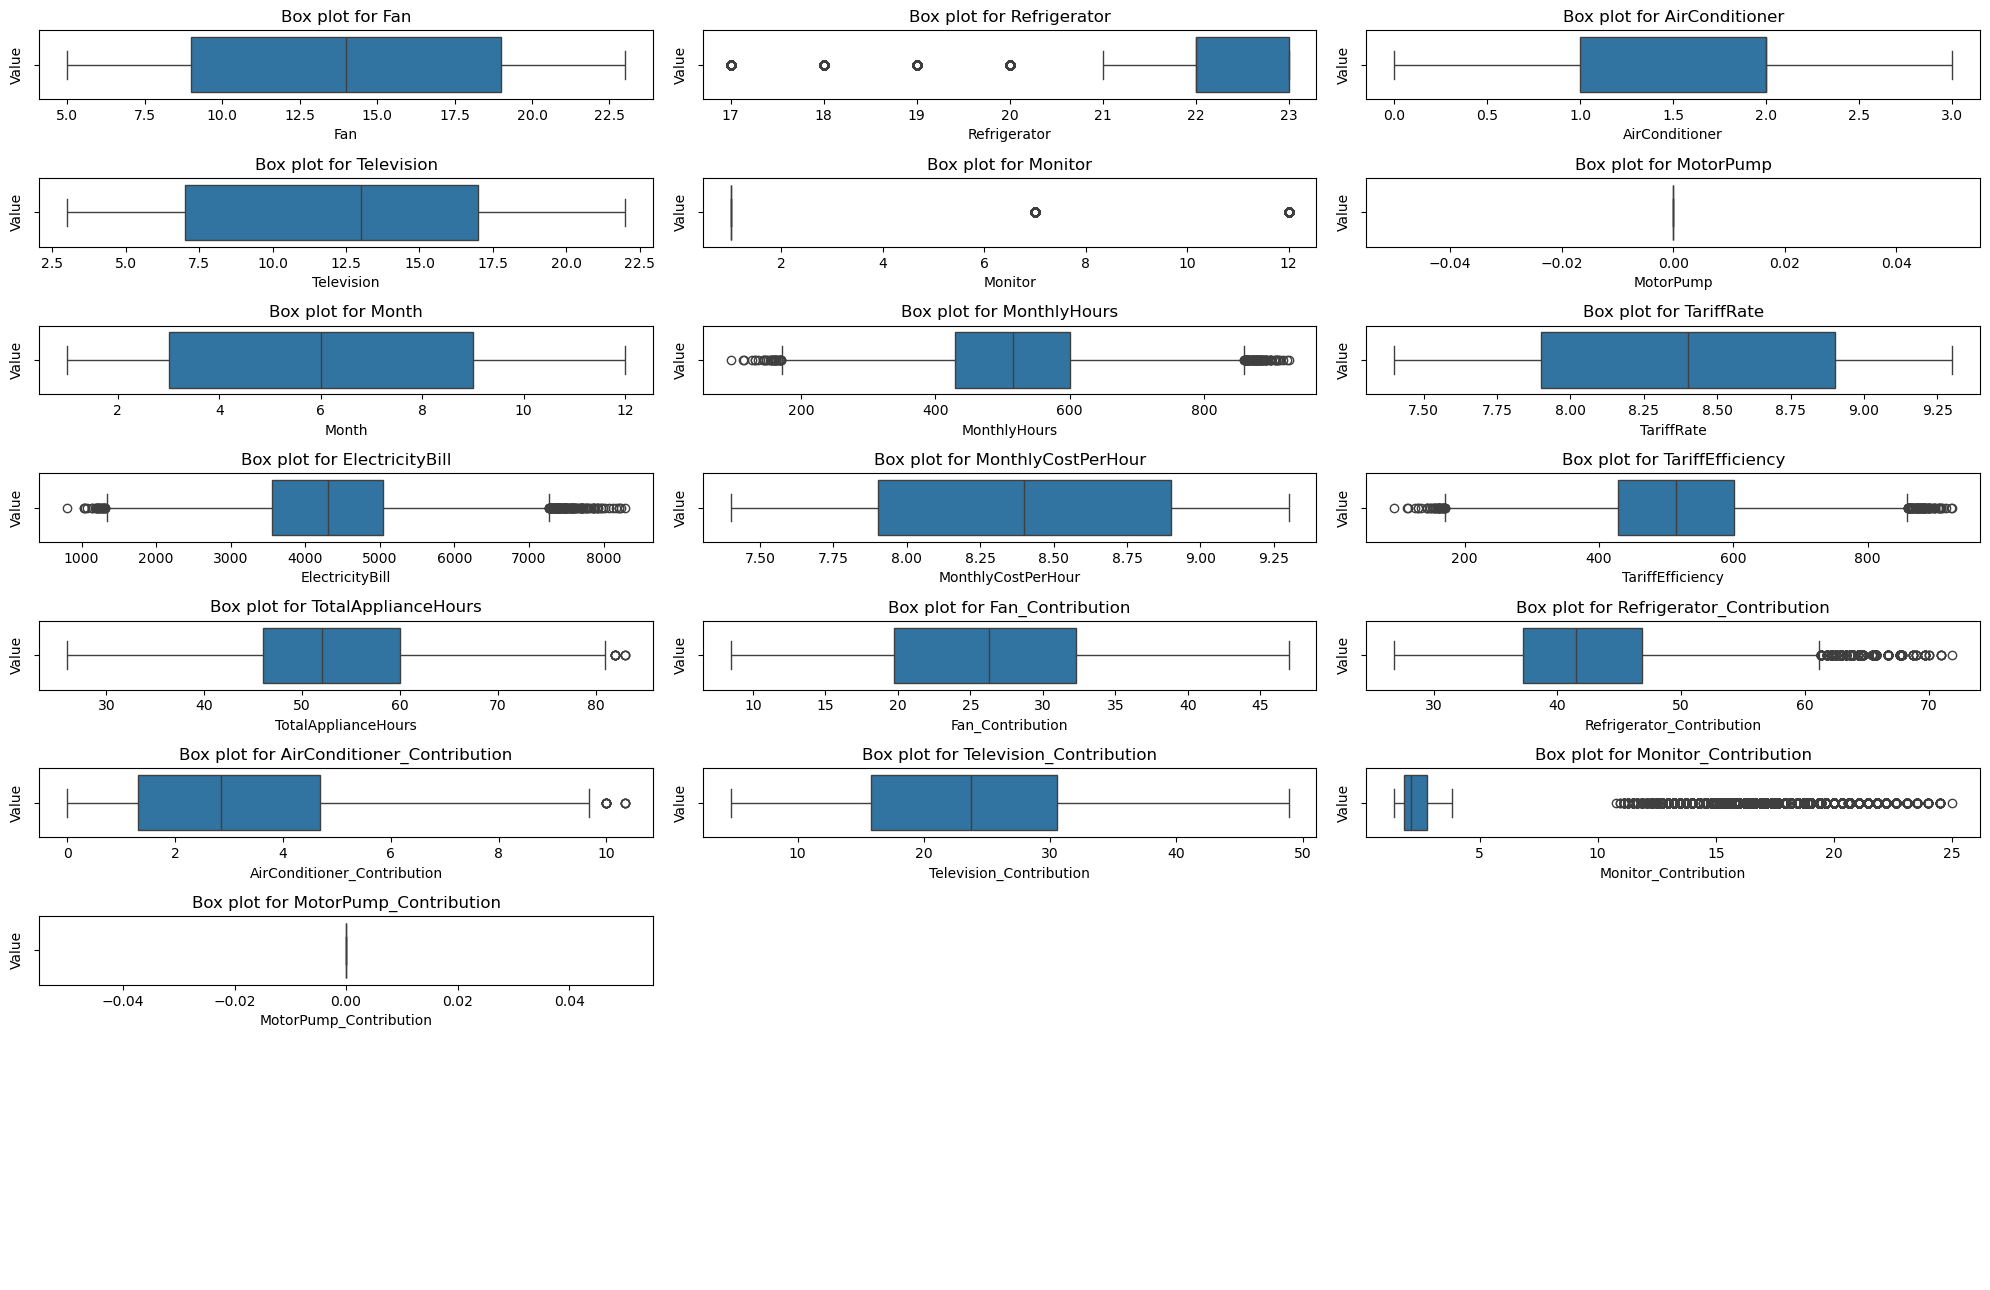

In [16]:
# Checking for outliers
#Only select numeric columns 
numeric_columns = df.select_dtypes(include=['float','integer']).columns[:]

# Grid layout
rows, cols = 9, 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()


In [17]:
# Dropping outliers
# Create a copy of the data
data_copy = df.copy()
# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=['float','integer'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.20)  # .20
q3 = numeric_data.quantile(0.80)  # .80
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(data_copy)

# Remove rows with outliers from the original DataFrame (important!)
data_copy = data_copy.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(data_copy)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

df = data_copy.copy()


Number of rows before removing outliers: 45345
Number of rows after removing outliers: 34654
Number of rows removed: 10691


In [18]:
# Univariate Analysis

In [19]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill', 'season', 'MonthlyCostPerHour', 'TariffEfficiency',
       'TotalApplianceHours', 'Fan_Contribution', 'Refrigerator_Contribution',
       'AirConditioner_Contribution', 'Television_Contribution',
       'Monitor_Contribution', 'MotorPump_Contribution', 'UsageCategory'],
      dtype='object')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22124\2563271991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='City', data=df, palette='viridis')


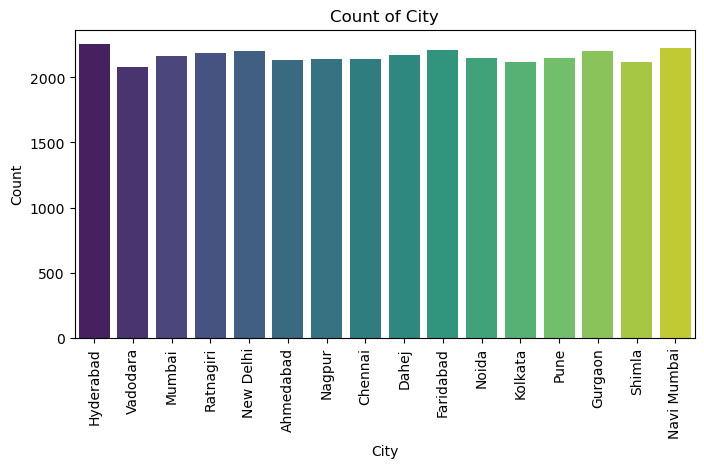

In [38]:
#city distibution plot
plt.figure(figsize=(8, 4))
sns.countplot(x='City', data=df, palette='viridis')
plt.title('Count of City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22124\2503271801.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Company', data=df, palette='viridis')


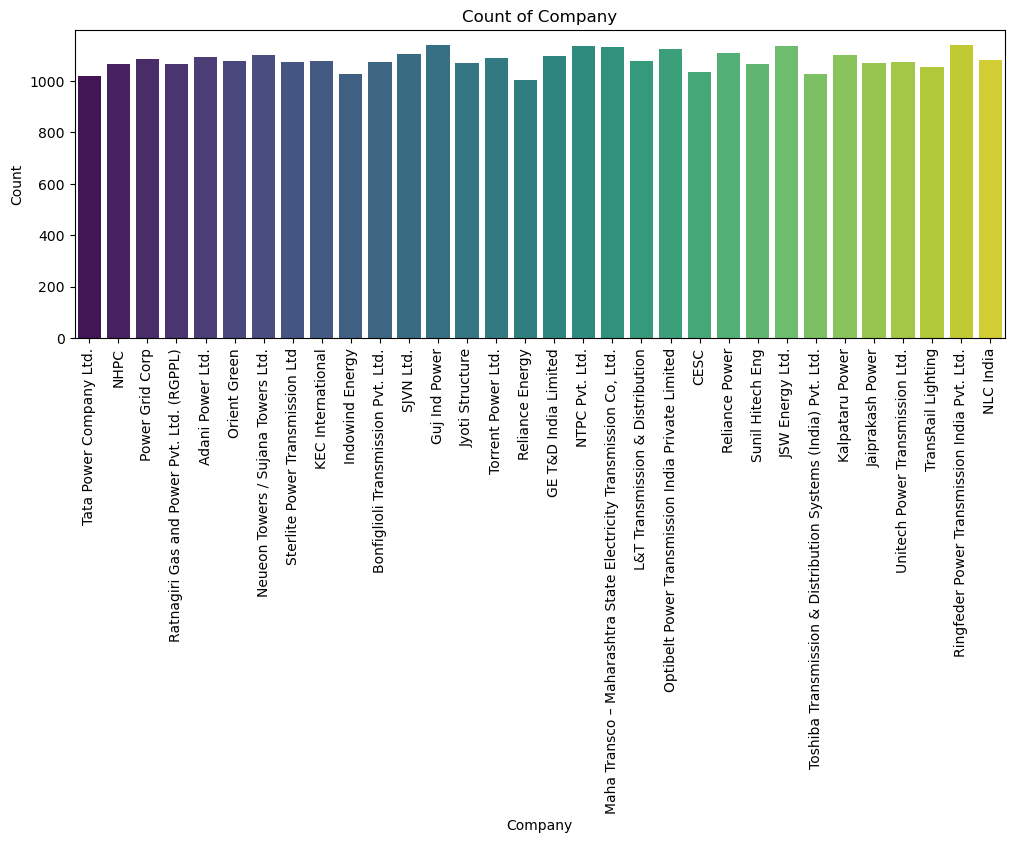

In [42]:
# company count distribution
plt.figure(figsize=(12, 4))
sns.countplot(x='Company', data=df, palette='viridis')
plt.title('Count of Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

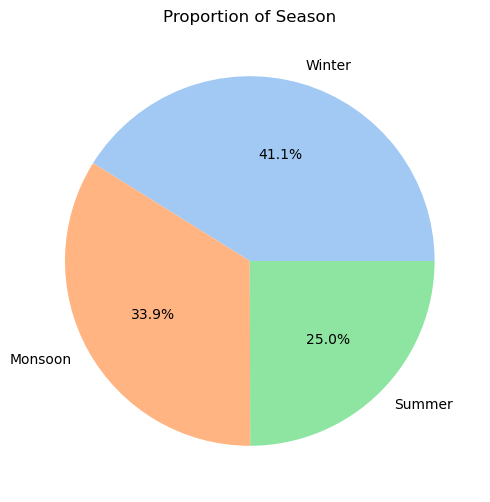

In [31]:
# seasonal pie chart distribution
    # Pie chart
plt.figure(figsize=(6, 6))
df['season'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Season')
plt.ylabel('')
plt.show()

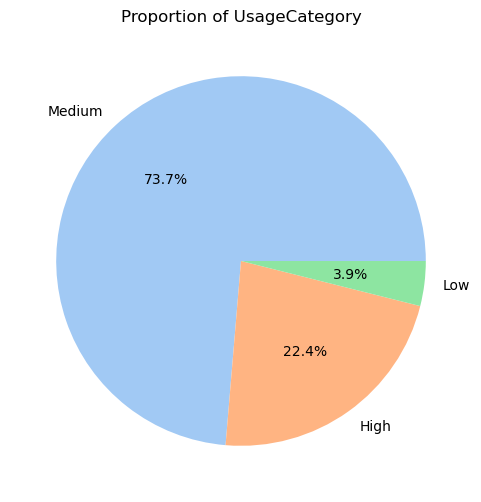

In [35]:
# usage category distribution
plt.figure(figsize=(6, 6))
df['UsageCategory'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of UsageCategory')
plt.ylabel('')
plt.show()

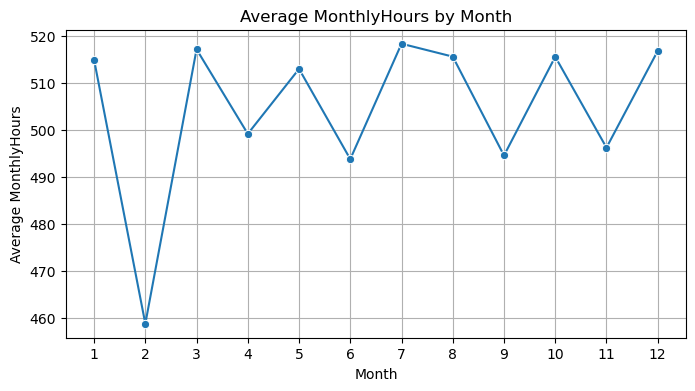

In [21]:
# Line plot for MonthlyHours across months
month_summary = df.groupby('Month')['MonthlyHours'].mean()
plt.figure(figsize=(8, 4))
sns.lineplot(x=month_summary.index, y=month_summary.values, marker='o')
plt.title('Average MonthlyHours by Month')
plt.xlabel('Month')
plt.ylabel('Average MonthlyHours')
plt.xticks(range(1, 13))
plt.grid()
plt.show()


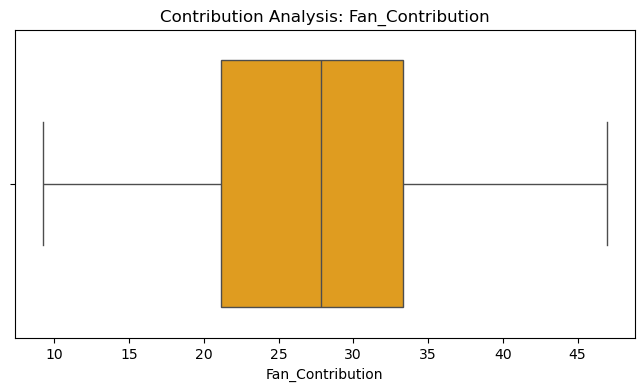

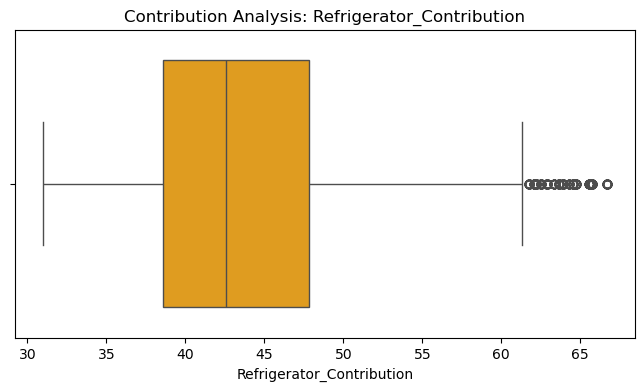

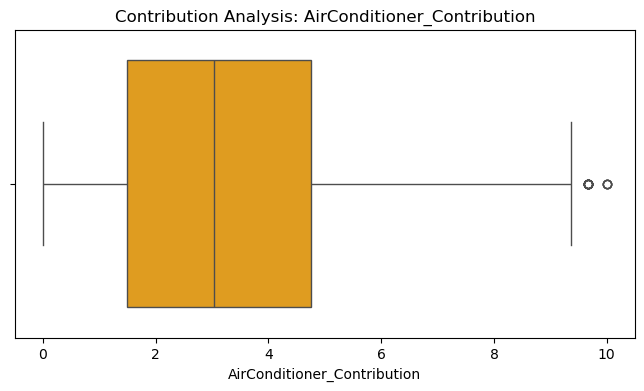

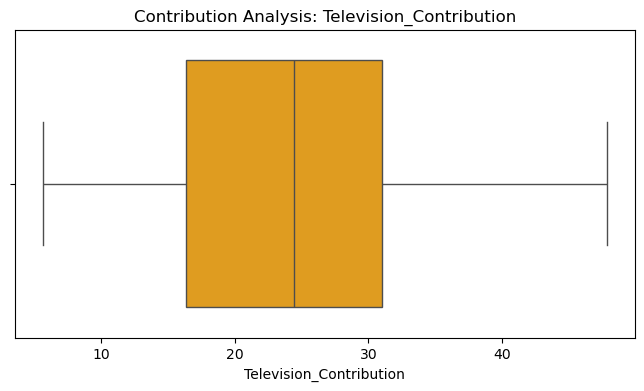

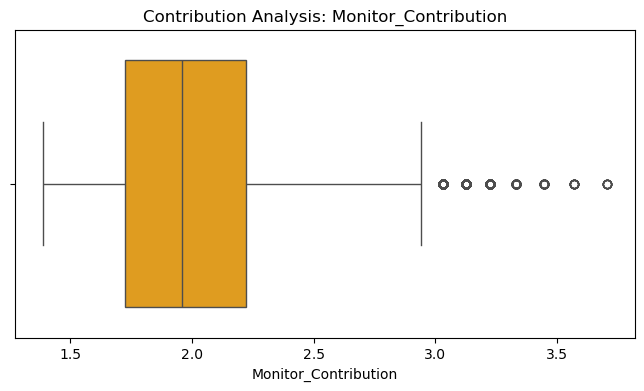

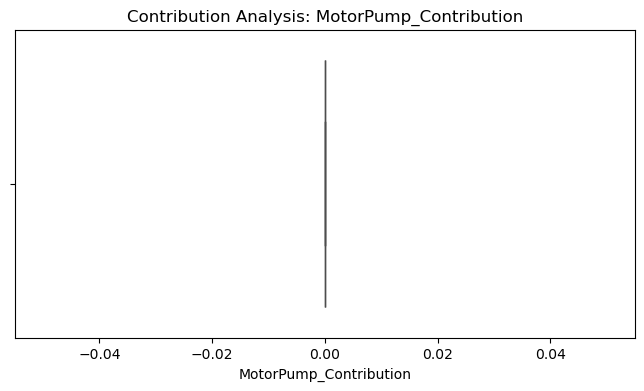

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22124\3035221426.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_contributions.values, y=mean_contributions.index, palette='Blues_r')


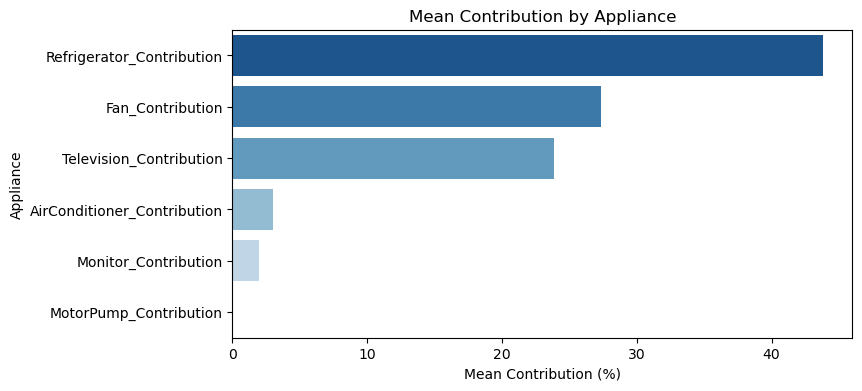

In [22]:
# Appliance contribution analysis
contribution_columns = [
    'Fan_Contribution', 'Refrigerator_Contribution', 'AirConditioner_Contribution',
    'Television_Contribution', 'Monitor_Contribution', 'MotorPump_Contribution'
]
for column in contribution_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column], color='orange')
    plt.title(f'Contribution Analysis: {column}')
    plt.xlabel(column)
    plt.show()

# Compare mean contributions
mean_contributions = df[contribution_columns].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=mean_contributions.values, y=mean_contributions.index, palette='Blues_r')
plt.title('Mean Contribution by Appliance')
plt.xlabel('Mean Contribution (%)')
plt.ylabel('Appliance')
plt.show()


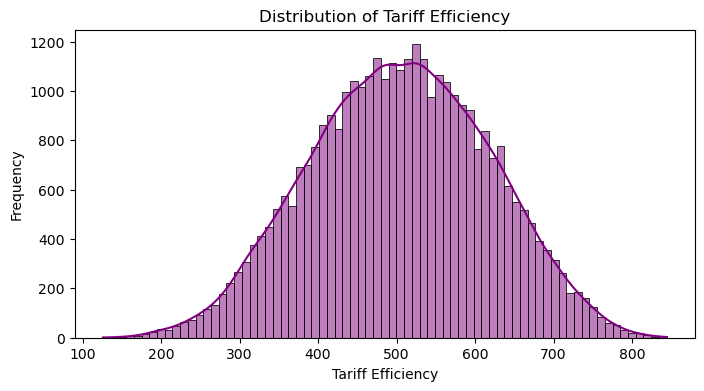

In [23]:
plt.figure(figsize=(8, 4))
sns.histplot(df['TariffEfficiency'], kde=True, color='purple')
plt.title('Distribution of Tariff Efficiency')
plt.xlabel('Tariff Efficiency')
plt.ylabel('Frequency')
plt.show()


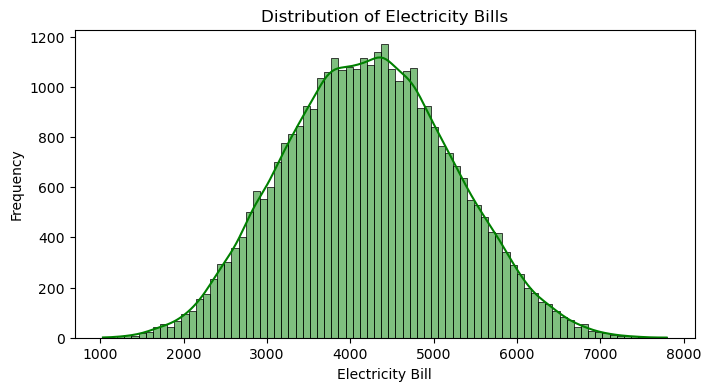

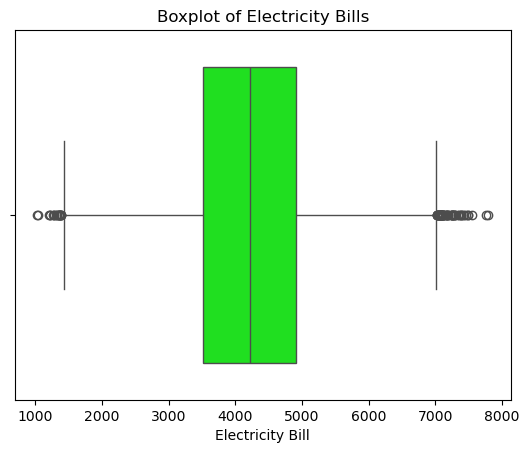

In [24]:
plt.figure(figsize=(8, 4))
sns.histplot(df['ElectricityBill'], kde=True, color='green')
plt.title('Distribution of Electricity Bills')
plt.xlabel('Electricity Bill')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df['ElectricityBill'], color='lime')
plt.title('Boxplot of Electricity Bills')
plt.xlabel('Electricity Bill')
plt.show()
